<a href="https://colab.research.google.com/github/nascimento-luciano/Data-Analysis-CPTM/blob/main/time_series_project_demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How much missing values are there in each variable?
Variable | Missing values
Number of rows: 1033
Number of columns:  1


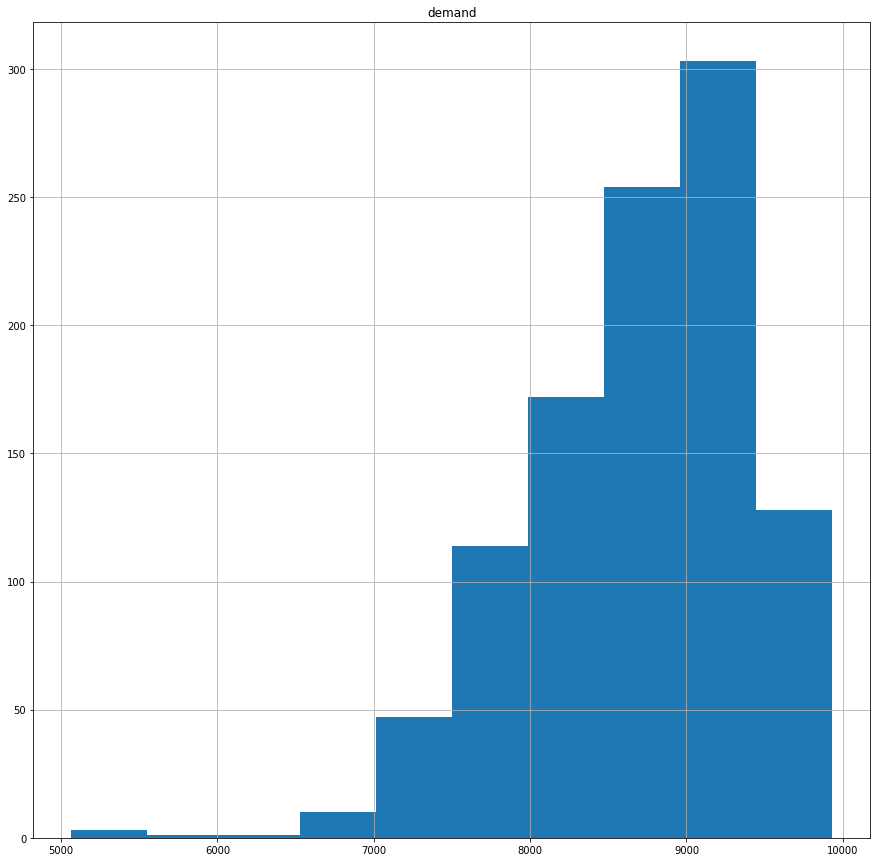

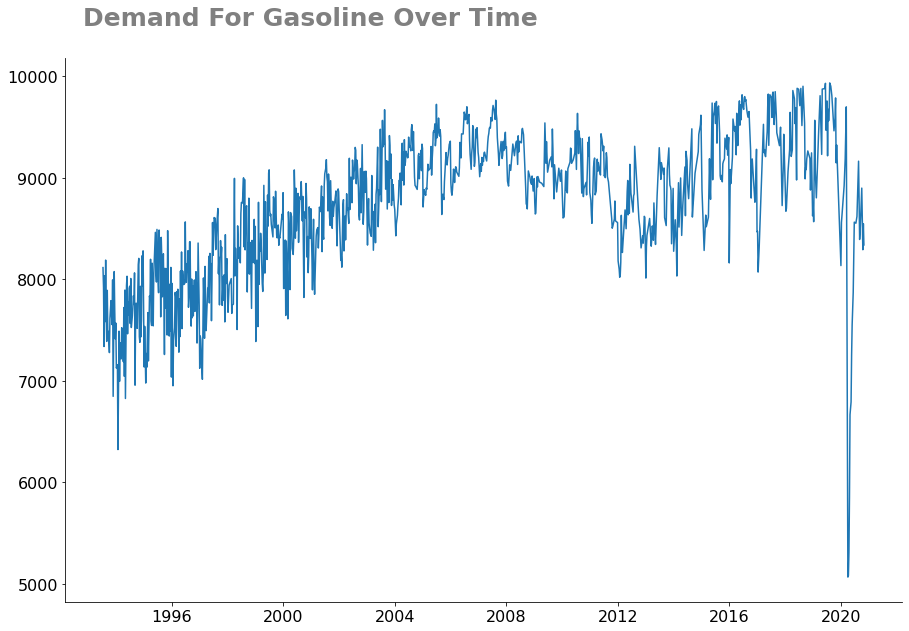

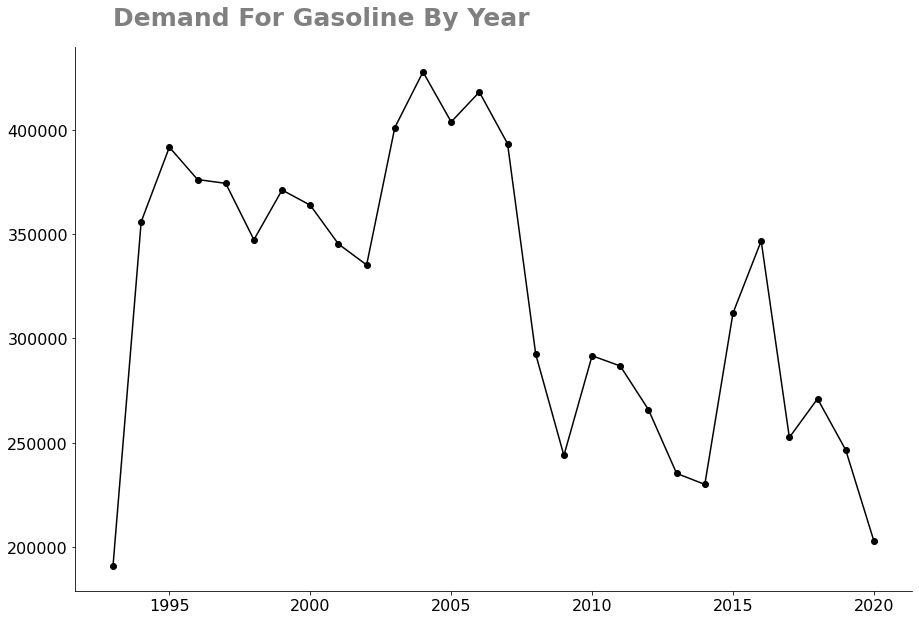

Order:  (2, 1, 1) MAPE: 2.8378006699687255
Order:  (3, 1, 1) MAPE: 2.8276805886872323
Order:  (4, 1, 1) MAPE: 2.8286336771885563
Order:  (5, 1, 1) MAPE: 2.8663363482043365
Order:  (2, 1, 2) MAPE: 2.829836063791399
Order:  (3, 1, 2) MAPE: 2.8301615660267854
Order:  (5, 1, 3) MAPE: 2.8224764632110015
Order:  (1, 1, 4) MAPE: 2.83049530229567
Order:  (2, 1, 4) MAPE: 2.8743244621075905
Order:  (10, 1, 1) MAPE: 2.820764484195622
Mean Absolute Percentage Error:  2.820764484195622


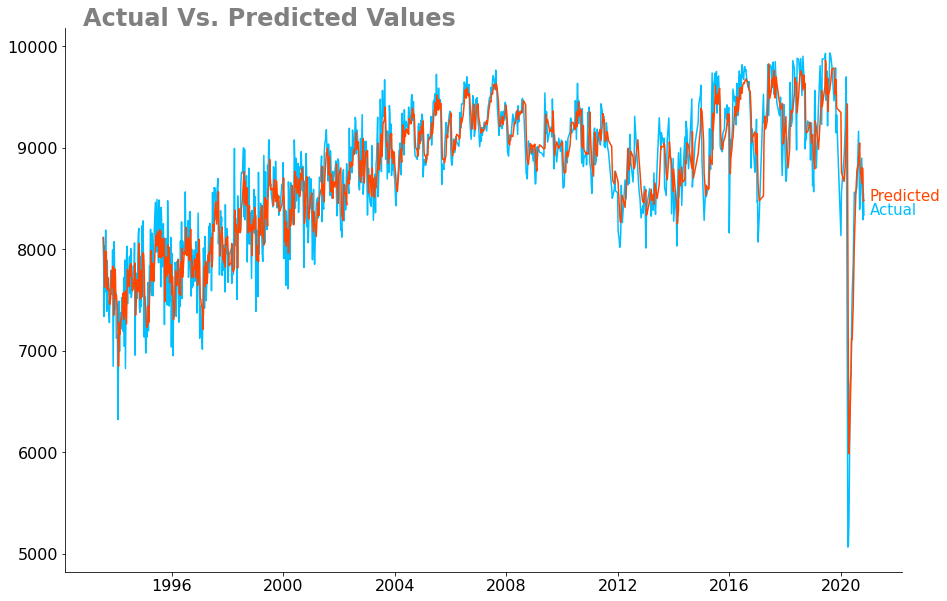

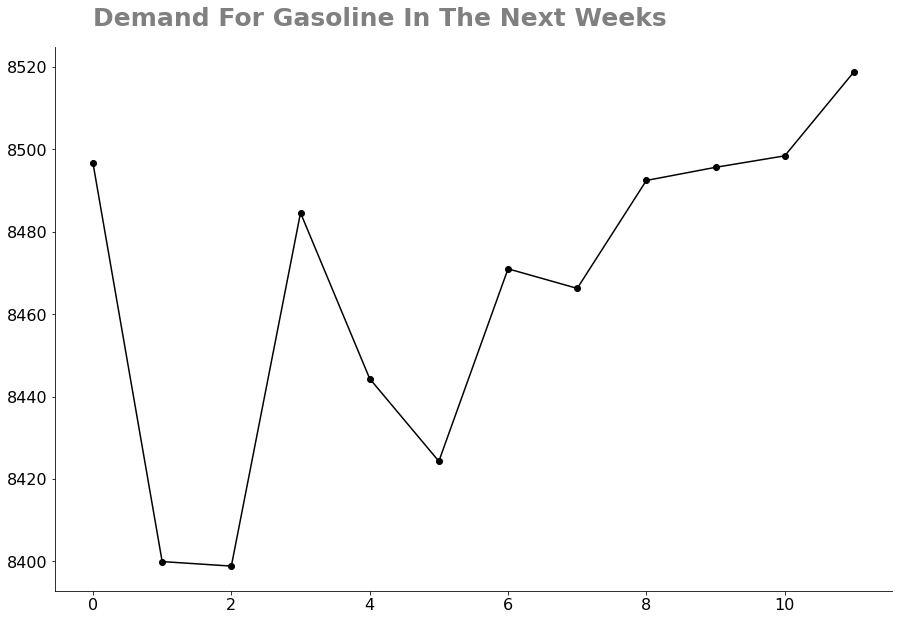

In [3]:

#Importanto Bibliotecas
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

#Packages
%matplotlib inline
warnings.filterwarnings("ignore")

#Carregando os Dados dataset CSV
#from google.colab import files 
#uploaded = files.upload()
 #or
df = pd.read_csv("https://github.com/MatheusRocha0/Demand-Forecasting/raw/main/Transportation_Fuels_Production_and_Demand__Beginning_1993.csv")
df.head()

# Helper Functions
def mape(actual, pred):
   return np.mean(np.abs((actual - pred) / actual)) * 100


#Limpando os dados
df = df[["Date", "U.S. Gasoline Demand (Thousand Barrels per Day)"]]
df.columns = ["date", "demand"]
df["date"] = pd.to_datetime(df.date)
df.set_index(df.date, inplace = True)
df.sort_index(ascending = True, inplace = True)
df.drop("date", axis = 1, inplace = True)
df.head()

#Tratando valores ausentes
print("""How much missing values are there in each variable?
Variable | Missing values""")
df.isnull().sum()

#Tratamento de duplicatas
df.drop_duplicates(inplace = True)

#Forma do conjunto de dados
print("Number of rows:", df.shape[0])
print("Number of columns: ", df.shape[1])

#Tipos de dados
df.hist(figsize = (15, 15))
plt.show()

#Demanda de gasolina ao longo do tempo
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(df.index, df.demand)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.text(s = "Demand For Gasoline Over Time", fontsize = 25, color = "gray", weight = "bold", x = 727500, y = 10500)
plt.show()

#Demanda agrupada por ano
gr_dt = df.groupby(df.index.year).sum()
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(gr_dt.index, gr_dt.demand, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.text(s = "Demand For Gasoline By Year", fontsize = 25, color = "gray", weight = "bold", x = 1993, y = 450000)
plt.show()


#Estatisticas
df.describe().transpose()

#Procurando os melhores parâmetros
params = [
(2, 1, 1),
(3, 1, 1),
(4, 1, 1),
(5, 1, 1),
(2, 1, 2),
(3, 1, 2),
(4, 1, 3),
(5, 1, 3),
(1, 1, 4),
(2, 1, 4),
(3, 1, 4),
(4, 1, 4),
(5, 1, 4),
(10, 1, 1)
]
 
for param in params:
   try:
      model = ARIMA(df.demand, order = param).fit()
      acc = mape(df.demand, model.predict(typ = "levels"))
      print("Order: ", param, "MAPE:", acc)
   except: 
      pass

#Treinando o modelo final
model = ARIMA(df.demand, order = (10, 1, 1)).fit()
acc = mape(df.demand, model.predict(typ = "levels"))
print("Mean Absolute Percentage Error: ", acc)

#Valores reais x Previsões
fig, ax = plt.subplots(figsize = (15, 10))
actual = ax.plot(df.demand, color = "deepskyblue")
pred = ax.plot(model.predict(typ = "levels"), color = "orangered")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
 
plt.text(s = "Actual Vs. Predicted Values", x = 727500, y = 10200, fontsize = 24, weight = "bold", color = "gray")
plt.text(s = "Actual", x = 737800, y = df.demand[-1], color = "deepskyblue", fontsize = 15)
plt.text(s = "Predicted", x = 737800, y = model.predict(typ = "levels")[-1], color = "orangered", fontsize = 15)
 
plt.show()


#Previsão
forecasting = model.forecast(12, alpha = 0.01)[0]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(forecasting, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
 
plt.text(s = "Demand For Gasoline In The Next Weeks", x = 0, y = 8530, fontsize = 25, color = "gray", weight = "bold")
 
plt.show()